# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

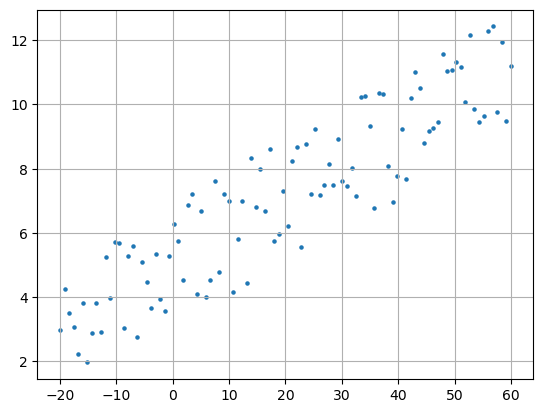

In [3]:
x=np.linspace(-20,60,100)
y=5+1/10*x+np.random.uniform(-2,2,100)
plt.scatter(x,y,s=5) # s  ->  size
plt.grid()

In [4]:
from scipy.optimize import minimize

In [7]:
minimize?

In [6]:
# Definimos nuestro criterio de optimización (mínimos cuadrados)
def fun(beta,x,y):
    f=beta[0]+beta[1]*x
    return np.sum((y-f)**2)

In [8]:
beta0=np.array([1,1])
sol=minimize(fun,beta0,args=(x,y))
sol

      fun: 133.1375440451924
 hess_inv: array([[ 8.67574282e-03, -1.83787133e-04],
       [-1.83787133e-04,  9.18935653e-06]])
      jac: array([-3.81469727e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([5.13111365, 0.10293473])

In [9]:
sol.x # beta óptima

array([5.13111365, 0.10293473])

In [10]:
sol.fun # la suma de los errores al cuadrado evaluados en la solución óptima

133.1375440451924

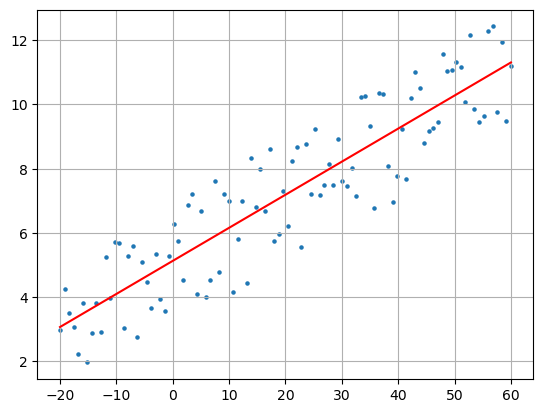

In [12]:
plt.scatter(x,y,s=5)
f=sol.x[0]+sol.x[1]*x
plt.plot(x,f,'r')
plt.grid()

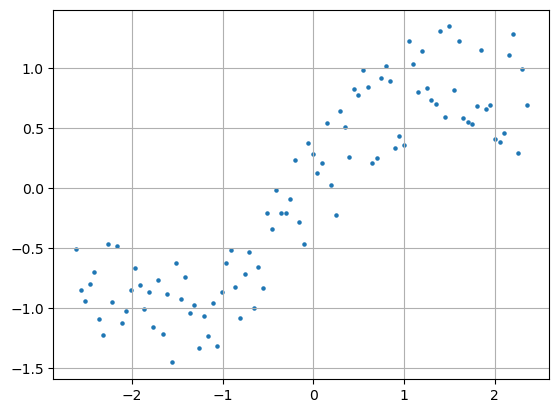

In [15]:
x=np.linspace(-5/6*np.pi,3/4*np.pi,100)
y=np.sin(x)+np.random.uniform(-0.5,0.5,100)
plt.scatter(x,y,s=5)
plt.grid()

In [16]:
beta0=np.random.rand(2) # Se necesitan dos valores para ajustar un polinomio lineal
sol1=minimize(fun,beta0,args=(x,y))
sol1

      fun: 15.493752047442376
 hess_inv: array([[0.9763357 , 0.16269658],
       [0.16269658, 0.02952528]])
      jac: array([0.00000000e+00, 3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([-1.25041428e-04,  4.85854614e-01])

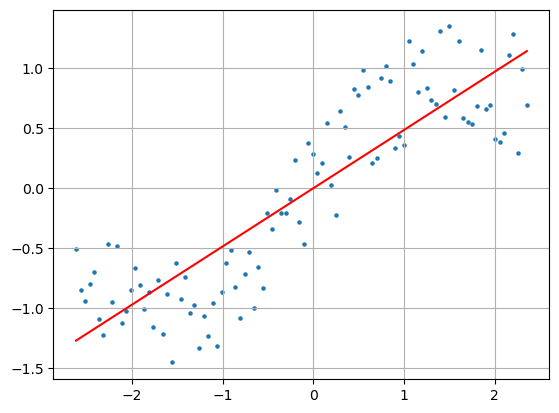

In [17]:
plt.scatter(x,y,s=5)
f=sol1.x[0]+sol1.x[1]*x
plt.plot(x,f,'r')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

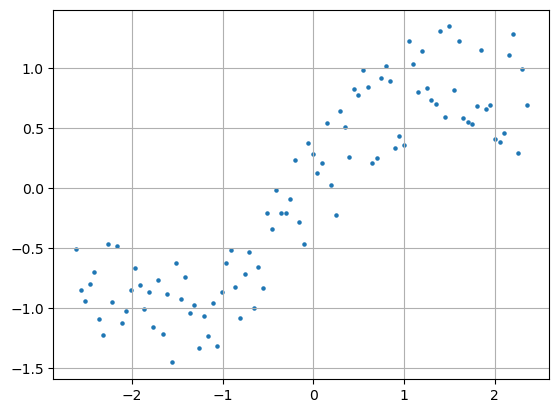

In [18]:
plt.scatter(x,y,s=5)
plt.grid()

In [19]:
# Ajuste de polinomio cuadrático
# 
# Definimos el criterio de optimización para el polinomio de grado dos
def fun(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*x**2
    return np.sum((y-f)**2)

In [20]:
beta0=np.random.rand(3) # Ahora necesitamos tres valores para 'beta'
sol2=minimize(fun,beta0,args=(x,y))
sol2

      fun: 15.485382051532467
 hess_inv: array([[ 0.01119117, -0.00046061, -0.00294787],
       [-0.00046061,  0.00247379,  0.0003699 ],
       [-0.00294787,  0.0003699 ,  0.0014129 ]])
      jac: array([1.07288361e-06, 1.43051147e-06, 2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([-0.01027185,  0.48712782,  0.00486331])

El polinomio resultante es
$$
-0.0103+0.4871x+0.0049x^2
$$

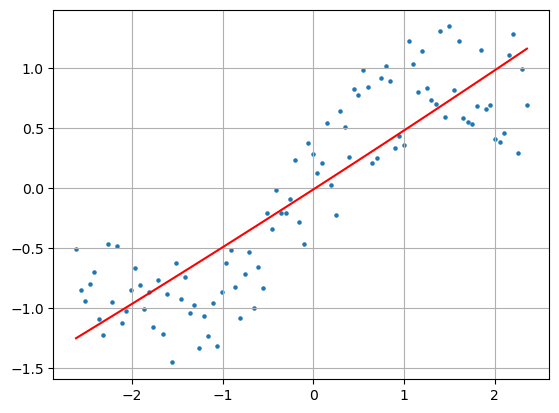

In [22]:
plt.scatter(x,y,s=5)
f=sol2.x[0]+sol2.x[1]*x+sol2.x[2]*x**2
plt.plot(x,f,'r')
plt.grid()

In [23]:
# Ajuste del polinomio cúbico
# 
# Criterio de opimización para el polinomio de grado tres
def fun(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    return np.sum((y-f)**2)
beta0=np.random.rand(4)
sol3=minimize(fun,beta0,args=(x,y))
sol3

      fun: 8.33835398781802
 hess_inv: array([[ 0.01140326,  0.00114483, -0.00311669, -0.0004299 ],
       [ 0.00114483,  0.01462651, -0.00090804, -0.00325421],
       [-0.00311669, -0.00090804,  0.00154728,  0.0003422 ],
       [-0.0004299 , -0.00325421,  0.0003422 ,  0.0008714 ]])
      jac: array([1.19209290e-07, 0.00000000e+00, 2.38418579e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([ 0.04478578,  0.90391244, -0.038964  , -0.11160533])

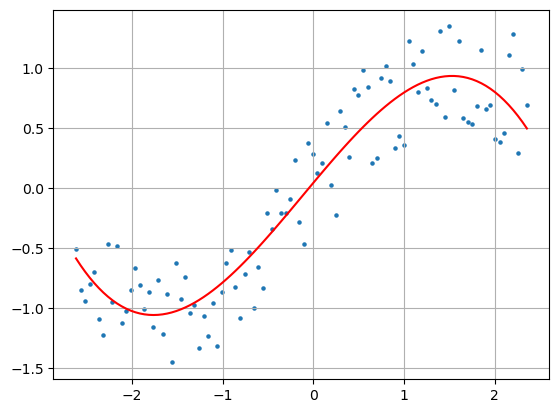

In [24]:
plt.scatter(x,y,s=5)
f=sol3.x[0]+sol3.x[1]*x+sol3.x[2]*x**2+sol3.x[3]*x**3
plt.plot(x,f,'r')
plt.grid()

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.